In [1]:
from keras.datasets import mnist
import numpy as np
from numpy import argmax

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Visualizaztion

import matplotlib.pyplot as plt

In [4]:
#training data 
x_train.shape

#Note, there is no color channels in this, might have to reshape to add channel

(60000, 28, 28)

In [5]:
#single image
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape
#in pixels

(28, 28)

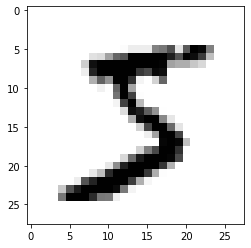

In [8]:
plt.imshow(single_image, cmap='gray_r')

# _r will reverse the color mapping

In [9]:
# labels 

y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
# looks like our labels are literally categories of numbers. 
# We need to translate this to be "one hot encoded" so our CNN can understand, 
# otherwise it will think this is some sort of regression problem on a continuous axis

In [12]:
from keras.utils.np_utils import to_categorical

In [13]:
y_train.shape

(60000,)

In [14]:
#example to convert this into one hot encoding
y_example = to_categorical(y_train)
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_example[0]

#at index 5, it is 1. Therefore it is the number 5. 
#This data can be understood by the CNN and help in the sigmoid function to label the classes

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
#convert labels to hot encoding
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [17]:
#Normalize x data to be between 0 and 1
single_image.max()

255

In [18]:
x_train = x_train/x_train.max()

In [19]:
x_test = x_test/x_test.max()

In [20]:
scaled_image = x_train[0]

In [21]:
scaled_image
#all values between 0 and 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
scaled_image.max()

1.0

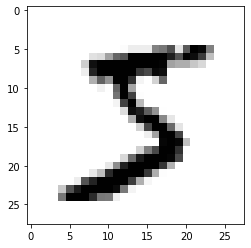

In [23]:
plt.imshow(scaled_image, cmap='gray_r')

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_train = x_train.reshape(60000,28,28,1)

#Reshape to include channel dimension (in this case, 1 channel)

In [26]:
x_test.shape

(10000, 28, 28)

In [27]:
x_test = x_test.reshape(10000,28,28,1)

In [28]:
x_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

# training the model

In [29]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [30]:
model = Sequential()

#Convolution Layer 
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))

#Pooling layer 
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten the images from 2d --> 1d
model.add(Flatten())

# 128 neurons for dense hidden layer 
model.add(Dense(128,activation='relu'))

#output layer is the classifier which has 10 possible classes 
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])



In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [32]:
#train the model

In [33]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1420 - accuracy: 0.9571
Epoch 2/2
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0494 - accuracy: 0.9855


In [34]:
# evaluate the model

In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
model.evaluate(x_test,y_cat_test)

#1875 is not the number of samples, that is the number of batches in each epoch. 
#The default batch size is 32 so 60,000/32 = 1875. 
#The weights of the neural networks are updated after every batch.The same goes to 313.

313/313 [==============================] - 1s 4ms/step - loss: 0.0446 - accuracy: 0.9852


[0.04464477673172951, 0.9851999878883362]

In [37]:
from sklearn.metrics import classification_report

In [38]:
#predictions = model.predict_classes(x_test)
#predictions = (model.predict(x_test) > 0.5).astype("int32")

import numpy as np
from numpy import argmax

predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 4ms/step


In [39]:
#prediction = (argmax(to_categorical(predictions), axis=1))

In [40]:
y_cat_test.shape

(10000, 10)

In [41]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [42]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [43]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

